### 映射拆包
调用函数时可以多次使用，但是键一定要是字符串 ，且在所有参数中唯一。

In [1]:
def dump(**kwargs):
    return kwargs

dump(**{'x': 1}, y=2, **{'c' : 3})

{'x': 1, 'y': 2, 'c': 3}

用于字面量,此时键可以不唯一，后面的覆盖前面的

In [2]:
{'a' : 0, **{'x': 1}, 'y':2, **{'z':3,'x':4}}

{'a': 0, 'x': 4, 'y': 2, 'z': 3}

### 合并映射
`|`和`|=`。`|`运算符创建一个新映射。采用`|=`则不创建新映射。

In [3]:
d1 ={'a':1,'b':3}
d2 = {'a':2,'b':4,'c':6}
d1 | d2

{'a': 2, 'b': 4, 'c': 6}

In [4]:
d1

{'a': 1, 'b': 3}

### 模式匹配处理映射
常用于半结构化数据

In [6]:
def get_creators(record: dict) -> list:
    match(record):
        case{'type':'book','api':2,'authors':[*names]}:
            return names
        case{'type':'book','api':1,'author':names}:
            return [names]
        case{'type':'book'}:
            raise ValueError(f"Invalid 'book' record: {record!r}")
        case{'type':'movie','director':name}:
            return [name]
        case _:
            raise ValueError(f'Invaid record: {record!r}')
        
# !r表示对变量调用__repr__

In [7]:
b1 = dict(api=1,author='Douglas Hofstators',
          type = 'book', title = 'Godel, Escher, Bach')
get_creators(b1)

['Douglas Hofstators']

In [8]:
from collections import OrderedDict
b2 = OrderedDict(api=2,type='book',title='Python in a Nutshell',
                 authors = 'Martelli Ravenscroft Holden'.split())
get_creators(b2)

['Martelli', 'Ravenscroft', 'Holden']

In [9]:
get_creators({'type':'book','pages':770})

ValueError: Invalid 'book' record: {'type': 'book', 'pages': 770}

In [10]:
get_creators('spam, spam')

ValueError: Invaid record: 'spam, spam'

没有必要使用 `**extra` 匹配多出的键值对,倘若你想把多出的键值对  捕获到一个 dict 中,可以在一个变量前面加上 **,不过必须放在模式最后。

In [11]:
food = dict(category='ice cream', flavor='vanilla', cost=199)
match food:
    case {'category': 'ice cream', **details}:
        print(f'Ice dedails: {details}')

Ice dedails: {'flavor': 'vanilla', 'cost': 199}


### 映射类型标准API
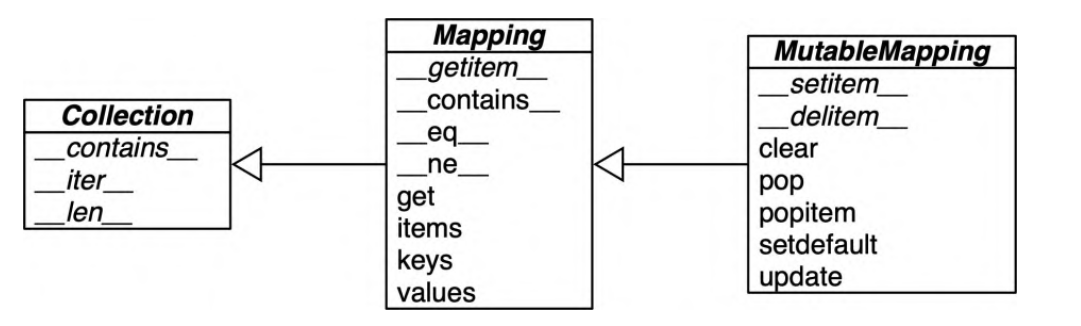
如果一个对象的哈希码在整个生命周期内永不改变(依托  `__hash__()` 方法),而且可与其他对象比较(依托 `__eq__()` 方法),那么这个对象就是可哈希的。两个可哈希对象仅当哈希码 相同时相等。

In [ ]:
import re # 正则表达式模块

WORD_RE =re.compile(r'\w+') # 编译一个正则表达式，用于匹配多个单词

index ={}
with open('zen.txt', encoding='utf-8') as fp:
    for line_no, line in enumerate(fp, 1): # 获取行内容和行号
        for match in WORD_RE.finditer(line):# 遍历行中所有的匹配项,返回迭代器
            # print(match)
            word = match.group() # 获取匹配的单词
            # print(word)
            column_no = match.start()+1
            location = (line_no, column_no)
            occurences = index.get(word, [])
            # print(occurences)
            occurences.append(location)
            index[word] = occurences

# for word in sorted(index, key=str.upper):
#     print(word,index[word])

The
[]
Zen
[]
of
[]
Python
[]
by
[]
Tim
[]
Peters
[]
Beautiful
[]
is
[]
better
[]
than
[]
ugly
[]
Explicit
[]
is
[(3, 11)]
better
[(3, 14)]
than
[(3, 21)]
implicit
[]
Simple
[]
is
[(3, 11), (4, 10)]
better
[(3, 14), (4, 13)]
than
[(3, 21), (4, 20)]
complex
[]
Complex
[]
is
[(3, 11), (4, 10), (5, 8)]
better
[(3, 14), (4, 13), (5, 11)]
than
[(3, 21), (4, 20), (5, 18)]
complicated
[]
Flat
[]
is
[(3, 11), (4, 10), (5, 8), (6, 9)]
better
[(3, 14), (4, 13), (5, 11), (6, 12)]
than
[(3, 21), (4, 20), (5, 18), (6, 19)]
nested
[]
Sparse
[]
is
[(3, 11), (4, 10), (5, 8), (6, 9), (7, 6)]
better
[(3, 14), (4, 13), (5, 11), (6, 12), (7, 9)]
than
[(3, 21), (4, 20), (5, 18), (6, 19), (7, 16)]
dense
[]
Readability
[]
counts
[]
Special
[]
cases
[]
aren
[]
t
[]
special
[]
enough
[]
to
[]
break
[]
the
[]
rules
[]
Although
[]
practicality
[]
beats
[]
purity
[]
Errors
[]
should
[]
never
[]
pass
[]
silently
[]
Unless
[]
explicitly
[]
silenced
[]
In
[]
the
[(10, 46)]
face
[]
of
[(1, 9)]
ambiguity
[]
refuse
[]


In [ ]:
import re
import sys

WORD_RE = re.compile(r'\w+')

index = {}
with open(sys.argv[1], encoding='utf-8') as fp:
    for line_no, line in enumerate(fp, 1):
        for matcch in WORD_RE.finditer(line):
            word = matcch.group()
            column_no = matcch.start() + 1
            location = (line_no, column_no)
            index.setdefault(word, []).append(location)
# 获取 word 出现的位置列表,如未找到,则设为 [];setdefault  返回该列表,可以直接更新,不用再搜索一次。
        

### 自动处理缺失的键
有时搜索的键不一定存在,为了以防万一,可以人为设置一个值,以方 便某些情况的处理。人为设置的值主要有两种方法:第一种是把普通的  dict 换成 defaultdict;第二种是定义 dict 或其他映射类型的子 类,实现 `__missing__` 方法。下面分别介绍这两种情况。

`defaultdict` 的 `default_factory` 仅为  `__getitem__` 提供默认值,其他方法用不到。例如,dd 是一个  `defaultdict` 对象,如果没有键 k,那么 `dd[k]` 将调用 `default_factory` 创建默认值,但是 `dd.get(k)` 依然返回 `None`,而且 `k in dd` 也返回 False。

In [5]:
import collections, re, sys

WORD_RE = re.compile(r'\w+')

index = collections.defaultdict(list)
with open('zen.txt', encoding='utf-8') as fp:
    for line_no, line in enumerate(fp, 1):
        for match in WORD_RE.finditer(line):
            word= match.group()
            column_no = match.start()+1
            location = (line_no, column_no)
            index[word].append(location)

for word in sorted(index, key=str.upper):
    print(word, index[word])

a [(19, 48), (20, 53)]
Although [(11, 1), (16, 1), (18, 1)]
ambiguity [(14, 16)]
and [(15, 23)]
are [(21, 12)]
aren [(10, 15)]
at [(16, 38)]
bad [(19, 50)]
be [(15, 14), (16, 27), (20, 50)]
beats [(11, 23)]
Beautiful [(3, 1)]
better [(3, 14), (4, 13), (5, 11), (6, 12), (7, 9), (8, 11), (17, 8), (18, 25)]
break [(10, 40)]
by [(1, 20)]
cases [(10, 9)]
complex [(5, 23)]
Complex [(6, 1)]
complicated [(6, 24)]
counts [(9, 13)]
dense [(8, 23)]
do [(15, 64), (21, 48)]
Dutch [(16, 61)]
easy [(20, 26)]
enough [(10, 30)]
Errors [(12, 1)]
explain [(19, 34), (20, 34)]
Explicit [(4, 1)]
explicitly [(13, 8)]
face [(14, 8)]
first [(16, 41)]
Flat [(7, 1)]
good [(20, 55)]
great [(21, 28)]
guess [(14, 52)]
hard [(19, 26)]
honking [(21, 20)]
idea [(19, 54), (20, 60), (21, 34)]
If [(19, 1), (20, 1)]
implementation [(19, 8), (20, 8)]
implicit [(4, 25)]
In [(14, 1)]
is [(3, 11), (4, 10), (5, 8), (6, 9), (7, 6), (8, 8), (17, 5), (18, 16), (19, 23), (20, 23)]
it [(15, 67), (19, 43), (20, 43)]
let [(21, 42)]
m

当我们使用`d[key]`的方式访问字典时，调用`__getitem__`方法，而`__getitem__`方法在找不到键时会调用`__missing__`方法（如果定义了的话）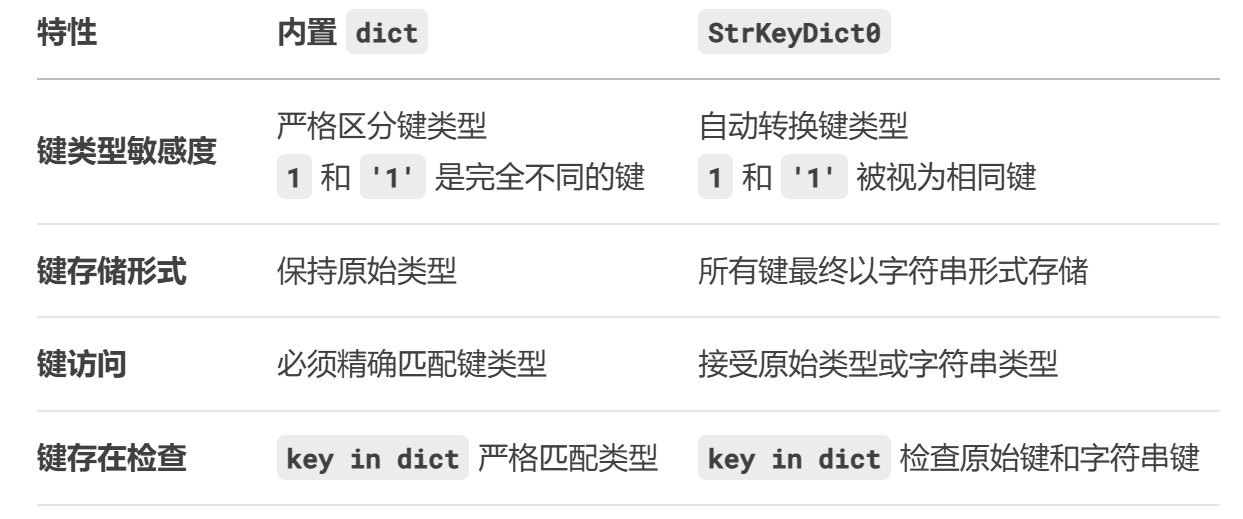

In [9]:
class StrKeyDict0(dict):# 继承自dict类
    def __missing__(self, key):
        '''当没有对应key时调用。首先检查key是不是字符串类型，若是，则证明字符串格式没问题，
        报错；若格式不对，先转换为字符串，再进行查找。
        若没有实例判断这一行，则每次查找，由于键不存在，会不断调用self[str(key)],进入无限递归'''
        if isinstance(key, str):# 检查key类型
            raise KeyError(key)
        return self[str(key)]
    
    def get(self, key, default=None):
        try:
            return self[key]
        except KeyError:
            return default
        
    def __contains__(self, key):
        '''
        若return str(key) in self，会递归调用__contain__。
        若不定义__contain__，则函数调用继承自list的__contain__方法，
        不回落到__missing__方法。
        in self.keys()：调用视图自身的 __contains__ 方法（非自定义方法），直接检查键是否存在，不会递归。
        '''
        return key in self.keys() or str(key) in self.keys()

In [36]:
d = StrKeyDict0({1:'one', '2': 'two', '3': 'three'})
d[4]

KeyError: '4'

defaultdict遇到没有的ley时，前后行为会出现不一致。

In [24]:
d = collections.defaultdict(list)
print("key" in d)  # 返回 False（未触发 __missing__）
d["key"]     # 返回 []（触发 __missing__ 并插入键）
"key" in d   # 返回 True（键已存在）

False


True

In [ ]:
d ={1:'one', '2': 'two', '3': 'three'}

False